In [1]:
import pandas as pd

In [2]:
lcn = pd.read_csv(r"E:\Python basics\Pranjal Sir\Pandas Data Sets\LungCapData_BMI.csv")

In [3]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
BMI          0
dtype: int64

In [4]:
lcn.columns[lcn.columns == 'object']

Index([], dtype='object')

In [5]:
lcn.Smoke = lcn.Smoke.replace({'no': 0, 'yes': 1})
lcn.Gender = lcn.Gender.replace({'male': 0, 'female': 1})
lcn.Caesarean = lcn.Caesarean.replace({'no': 0, 'yes': 1})

In [32]:
lcn = lcn.drop(['BMI'], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
lcn_train, lcn_test = train_test_split(lcn, test_size= .2)

In [35]:
lcn_train_x = lcn_train.iloc[:, 1::]
lcn_train_y = lcn_train.iloc[:, 0]

lcn_test_x = lcn_test.iloc[:, 1::]
lcn_test_y = lcn_test.iloc[:, 0]

In [36]:
print(lcn_train_x.shape , lcn_train_y.shape)

(580, 5) (580,)


In [37]:
print(lcn_test_x.shape , lcn_test_y.shape)

(145, 5) (145,)


In [38]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression() 

In [39]:
linreg.fit(lcn_train_x, lcn_train_y)

LinearRegression()

In [40]:
pred = linreg.predict(lcn_test_x)

In [41]:
Rsquare = linreg.score(lcn_train_x, lcn_train_y)
Rsquare

0.8527205428090854

In [42]:
# Adjusted R square

N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

AdjRsquare = 1 - (1- Rsquare)*(N-1) / (N-K-1)
AdjRsquare


0.8514376207081192

In [43]:
pred_train = linreg.predict(lcn_train_x)

In [44]:
err_train = lcn_train_y - pred_train
err_train

98    -0.721076
642    0.332149
106   -0.671996
584    0.337307
717   -0.661544
         ...   
123   -0.047302
305    0.887966
370    1.847210
702    1.231659
168   -0.876794
Name: LungCap, Length: 580, dtype: float64

In [45]:
import numpy as np

In [46]:
np.mean(err_train)

-3.811510494195882e-15

In [47]:
import matplotlib.pyplot as plt

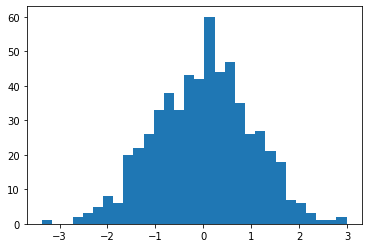

In [48]:
plt.hist(err_train , bins =30);

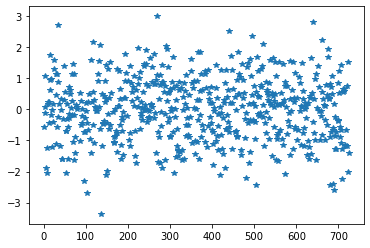

In [49]:
plt.plot(err_train , "*");  # Scatter plot

In [50]:
pred_actual = pd.DataFrame()
pred_actual['Actual'] = lcn_train_y
pred_actual['Predicted'] = pred_train

In [51]:
pred_test = linreg.predict(lcn_test_x)
err_test  = lcn_test_y - pred_test

MSE = np.mean(np.square(err_test))
MSE

1.1303936719806262

In [52]:
RMSE = np.sqrt(MSE)
RMSE

1.0631997328727214

In [53]:
MAPE = np.mean(np.abs(err_test * 100/ lcn_test_y))
MAPE

14.05869123867351

In [54]:
import seaborn as sns

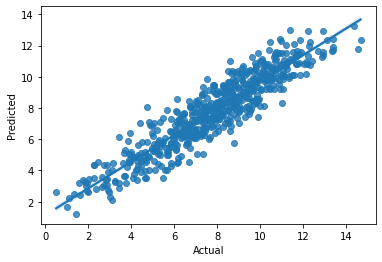

In [55]:
sns.regplot(x = 'Actual', y = 'Predicted', data = pred_actual);

----------------

### CAR Price

In [69]:
cp=pd.read_csv(r"E:\Python basics\Pranjal Sir\Pandas Data Sets\car_price.csv")

In [70]:
cp.head(2)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [71]:
cp = cp.replace({'?' : np.nan })
# convert ? to nulls

In [72]:
cp.isnull().sum()[cp.isnull().sum() > 0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [73]:
cp.normalized_losses.median()

115.0

In [74]:
cp.normalized_losses.info

<bound method Series.info of 0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized_losses, Length: 205, dtype: object>

In [75]:
cp.normalized_losses = cp.normalized_losses.astype(float)
cp.bore = cp.bore.astype(float)
cp.stroke = cp.stroke.astype(float)
cp.horsepower = cp.horsepower.astype(float)
cp.peak_rpm = cp.peak_rpm.astype(float)

In [76]:
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.num_of_doors = cp.num_of_doors.fillna('four')
cp.bore = cp.bore.fillna(cp.bore.mean())
cp.stroke = cp.stroke.fillna(cp.stroke.mean())
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())

In [83]:
cp = cp.dropna()

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
cp.Fuel_type = le.fit_transform(cp.Fuel_type)
cp.num_of_doors = cp.num_of_doors.replace({'two' : 2, 'four': 4})
cp.make = le.fit_transform(cp.make)
cp.aspiration = le.fit_transform(cp.aspiration)
cp.wheel_base = le.fit_transform(cp.wheel_base)
cp.engine_location = le.fit_transform(cp.engine_location)
cp.body_style = le.fit_transform(cp.body_style)
cp.engine_type = le.fit_transform(cp.engine_type)
cp.num_of_cylinders = cp.num_of_cylinders.replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})
cp.fuel_system = le.fit_transform(cp.fuel_system)

In [81]:
cp.price = cp.price.astype(float)

In [107]:
cp_train , cp_test = train_test_split(cp, test_size = .2)

In [108]:
cp_train_x = cp_train.iloc[:, :-1]
cp_train_y = cp_train.iloc[:, -1]

In [109]:
cp_test_x = cp_test.iloc[:, :-1]
cp_test_y = cp_test.iloc[:, -1]

In [110]:
lin_cp = LinearRegression()

In [111]:
lin_cp.fit(cp_train_x,cp_train_y)

LinearRegression()

In [112]:
Rsquare = lin_cp.score(cp_train_x, cp_train_y)
Rsquare

0.8722623582521091

In [113]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]

AdjRsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.8462994229374972

In [114]:
pred_train = lin_cp.predict(cp_train_x)

In [115]:
err_train = cp_train_y - pred_train
err_train

29     -357.730892
14     5526.934300
134     218.956203
155    -324.459404
192     804.168040
          ...     
34     -821.646342
179   -1170.722056
171    -674.511650
46    -2879.853584
81     1153.500513
Name: price, Length: 149, dtype: float64

In [116]:
np.mean(err_train)

-1.7872486488531098e-11

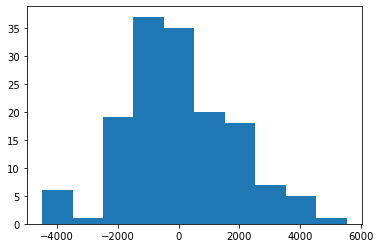

In [117]:
plt.hist(err_train);

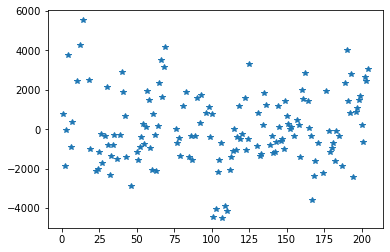

In [118]:
plt.plot(err_train,'*');

In [119]:
pred_actual = pd.DataFrame()
pred_actual['actual'] = cp_train_y
pred_actual['predicted'] = pred_train

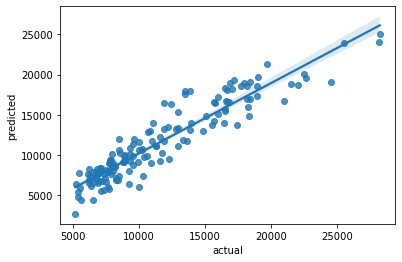

In [120]:
sns.regplot(x='actual', y='predicted', data = pred_actual);

In [121]:
pred_test = lin_cp.predict(cp_test_x)
err_test = cp_test_y - pred_test

In [122]:
MSE = np.mean(np.square(err_test))
MSE

4621382.107629013

In [123]:
RMSE = np.sqrt(MSE)
RMSE

2149.7400093101987

In [124]:
MAPE = np.mean(np.abs(err_test*100/cp_test_y))
MAPE

16.357102794995797

In [103]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [104]:
remove_outliers(cp, 'price',2)

(187, 26)
Number of outliers removed == > 14


In [106]:
cp = df1

-------------

In [127]:
inc = pd.read_csv(r"E:\Python basics\Pranjal Sir\Pandas Data Sets\insuranceLiner.csv")

In [130]:
inc.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
inc.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [134]:
inc.sex.replace({'female':0, 'male':1}, inplace = True)
inc.smoker.replace({'yes':1,'no':0}, inplace = True)
inc.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}, inplace = True)


In [162]:
inc_train , inc_test = train_test_split(inc, test_size = .2)

In [163]:
inc_train_x = inc_train.iloc[:, :-1]
inc_train_y = inc_train.iloc[:, -1]

In [164]:
inc_test_x = inc_test.iloc[:, :-1]
inc_test_y = inc_test.iloc[:, -1]

In [165]:
lin_inc = LinearRegression()

In [166]:
lin_inc.fit(inc_train_x,inc_train_y)

LinearRegression()

In [167]:
Rsquare = lin_inc.score(inc_train_x, inc_train_y)
Rsquare

0.6249457272554602

In [168]:
N = inc_train_x.shape[0]
K = inc_train_x.shape[1]

AdjRsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.6226424256828222

In [169]:
pred_train = lin_inc.predict(inc_train_x)

In [170]:
err_train = inc_train_y - pred_train
err_train

1058   -3275.784361
1214   -1868.890002
649     -502.981338
1293    -484.486392
900     -644.535729
           ...     
691    -2295.417498
1025   -2122.585806
982    -4575.529717
1257     -36.980695
580      625.536617
Name: charges, Length: 984, dtype: float64

In [171]:
np.mean(err_train)

5.53645656871935e-13

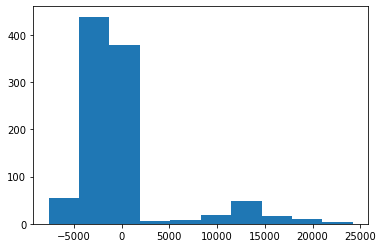

In [172]:
plt.hist(err_train);

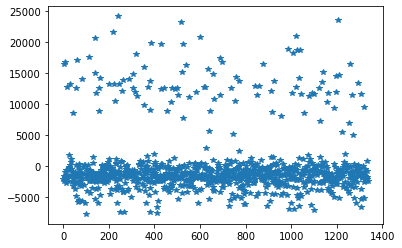

In [173]:
plt.plot(err_train,'*');

In [174]:
pred_actual = pd.DataFrame()
pred_actual['actual'] = inc_train_y
pred_actual['predicted'] = pred_train

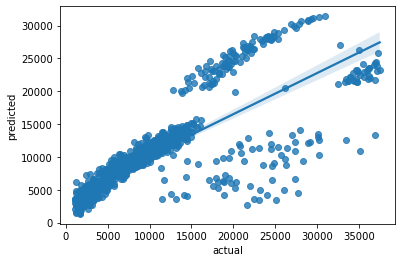

In [175]:
sns.regplot(x='actual', y='predicted', data = pred_actual);

In [178]:
pred_test = lin_inc.predict(inc_test_x)
err_test = inc_test_y - pred_test

In [179]:
MSE = np.mean(np.square(err_test))
MSE

29720678.93076645

In [180]:
RMSE = np.sqrt(MSE)
RMSE

5451.667536705301

In [181]:
MAPE = np.mean(np.abs(err_test*100/cp_test_y))
MAPE

42.49458414650721

In [159]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [160]:
remove_outliers(inc, 'charges',2)

(1231, 7)
Number of outliers removed == > 107


In [161]:
inc = df1

In [177]:
# the main parameters are not there then how can we build the model.
# reason for visiting hospital == cancer hoga toh charges alg hoge
# issliye model build nhi ho rha 

--------------------